In [ ]:
import numpy as np
from jesse import helpers, research

_, trading_1m = research.get_candles(
    "Binance Spot",
    "BTC-USDT",
    "1m",
    helpers.date_to_timestamp("2020-01-01"),
    helpers.date_to_timestamp("2025-04-25"),
    warmup_candles_num=0,
    caching=False,
    is_for_jesse=False,
)

trading_1m.shape


In [2]:
np.save("data/btc_1m.npy", trading_1m)

In [1]:
import numpy as np

candles = np.load("data/btc_1m.npy")
candles.shape

(2795040, 6)

In [ ]:
from pathlib import Path

from custom_indicators.toolbox.bar.merge import np_merge_bars

N = int(candles.shape[0] / 240)

for lag in [100, 140, 145, 146, 147, 148, 149, 150, 151, 160, 200, 250]:
    print(f"------------------{lag = }---------------------")
    if not Path(f"data/btc_1m_m4h_lag_{lag}.npy").exists():
        new_candles = np_merge_bars(candles, N, lag=lag)
        print(new_candles.shape)
        np.save(f"data/btc_1m_m4h_lag_{lag}.npy", new_candles)

------------------lag = 100---------------------
------------------lag = 140---------------------
------------------lag = 145---------------------
------------------lag = 146---------------------
n = 2750000, target = 11646
n = 2700000, target = 11646
n = 2650000, target = 11646
n = 2600000, target = 11646
n = 2550000, target = 11646
n = 2500000, target = 11646
n = 2450000, target = 11646
n = 2400000, target = 11646
n = 2350000, target = 11646
n = 2300000, target = 11646
n = 2250000, target = 11646
n = 2200000, target = 11646
n = 2150000, target = 11646
n = 2100000, target = 11646
n = 2050000, target = 11646
n = 2000000, target = 11646
n = 1950000, target = 11646
n = 1900000, target = 11646
n = 1850000, target = 11646
n = 1800000, target = 11646
n = 1750000, target = 11646
n = 1700000, target = 11646
n = 1650000, target = 11646
n = 1600000, target = 11646
n = 1550000, target = 11646
n = 1500000, target = 11646
n = 1450000, target = 11646
n = 1400000, target = 11646
n = 1350000, target 

In [2]:
from pathlib import Path

from custom_indicators.toolbox.bar.merge import np_merge_bars

for t in [-10, 10]:
    print(f"------------------{t = }---------------------")
    N = int(candles.shape[0] / (4 * 60 + t))
    path = Path(f"data/btc_1m_m4h{t}_lag_149.npy")
    if not path.exists():
        new_candles = np_merge_bars(candles, N, lag=149)
        print(new_candles.shape)
        np.save(path, new_candles)


------------------t = -10---------------------
n = 2750000, target = 12152
n = 2700000, target = 12152
n = 2650000, target = 12152
n = 2600000, target = 12152
n = 2550000, target = 12152
n = 2500000, target = 12152
n = 2450000, target = 12152
n = 2400000, target = 12152
n = 2350000, target = 12152
n = 2300000, target = 12152
n = 2250000, target = 12152
n = 2200000, target = 12152
n = 2150000, target = 12152
n = 2100000, target = 12152
n = 2050000, target = 12152
n = 2000000, target = 12152
n = 1950000, target = 12152
n = 1900000, target = 12152
n = 1850000, target = 12152
n = 1800000, target = 12152
n = 1750000, target = 12152
n = 1700000, target = 12152
n = 1650000, target = 12152
n = 1600000, target = 12152
n = 1550000, target = 12152
n = 1500000, target = 12152
n = 1450000, target = 12152
n = 1400000, target = 12152
n = 1350000, target = 12152
n = 1300000, target = 12152
n = 1250000, target = 12152
n = 1200000, target = 12152
n = 1150000, target = 12152
n = 1100000, target = 12152
n

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


def plot_kde(array: np.ndarray, lag=1):
    ret = np.log(array[lag:]) - np.log(array[:-lag])
    standard = (ret - ret.mean()) / ret.std()
    kurtosis = stats.kurtosis(standard, axis=None, fisher=False, nan_policy="omit")
    plt.figure(figsize=(8, 6))
    sns.kdeplot(standard, label="bar", color="blue")
    sns.kdeplot(
        np.random.normal(size=1000000), label="Normal", color="black", linestyle="--"
    )
    plt.xticks(range(-5, 6))
    plt.legend(loc=8, ncol=5)
    plt.title(
        f"bar_{array.shape[0]}_kurtosis_{kurtosis}",
        loc="center",
        fontsize=20,
        fontweight="bold",
        fontname="Times New Roman",
    )
    plt.xlim(-5, 5)
    plt.grid(1)
    plt.show()

In [1]:
import numpy as np
from jesse.utils import numpy_candles_to_dataframe

merged_bar = np.load("data/btc_1m_m4h_lag_149.npy")
df_merged_bar = numpy_candles_to_dataframe(merged_bar)
df_merged_bar.head()

,date,open,close,high,low,volume
2020-04-23 14:04:00,2020-04-23 14:04:00,7233.19,7288.22,10500.0,3782.13,8.900527e+06
2020-04-23 14:05:00,2020-04-23 14:05:00,7287.95,7338.21,7370.0,7286.04,2.087391e+03
2020-04-23 14:06:00,2020-04-23 14:06:00,7338.21,7333.15,7353.0,7320.00,6.119475e+02
2020-04-23 14:07:00,2020-04-23 14:07:00,7333.12,7349.65,7349.9,7330.63,4.029516e+02
2020-04-23 14:08:00,2020-04-23 14:08:00,7347.11,7365.01,7383.0,7344.37,5.985218e+02


In [2]:
from lightweight_charts import Chart

chart = Chart()
chart.set(df_merged_bar[["date", "open", "high", "low", "close", "volume"]])
chart.show(block=True)


RuntimeError: asyncio.run() cannot be called from a running event loop

(11646, 6)


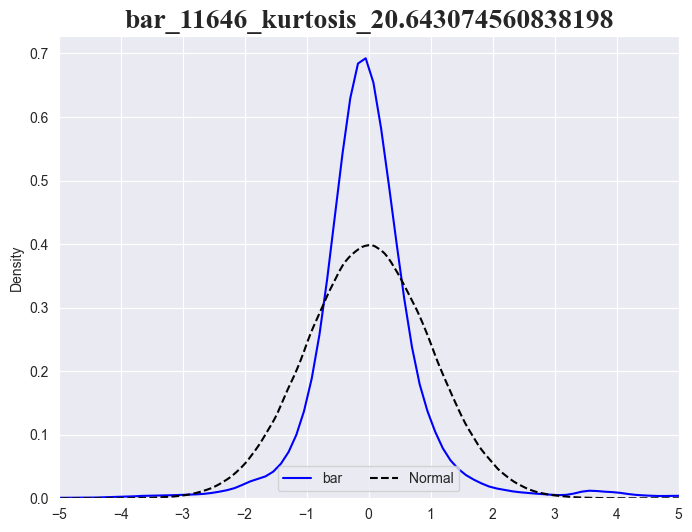

In [3]:
"""
lag 100: kurtosis = 46.53
lag 140: kurtosis = 21.92
lag 147: kurtosis = 21.76
lag 148: kurtosis = 21.01
lag 149: kurtosis = 20.64
lag 150: kurtosis = 20.95
lag 160: kurtosis = 24.14
lag 200: kurtosis = 33.81
"""

merged_bar = np.load("data/btc_1m_m4h_lag_149.npy")
print(merged_bar.shape)
plot_kde(merged_bar[:, 2], lag=1)

In [4]:
import numpy as np

candles = np.load("data/btc_1m.npy")
mask = np.array([i in merged_bar[:, 0] for i in candles[:, 0]]).astype(np.int8)
np.unique(mask, return_counts=True)

(array([0, 1], dtype=int8), array([2783394,   11646]))

In [5]:
from gplearn.fitness import make_fitness
from gplearn.genetic import SymbolicClassifier
from jesse import helpers
from sklearn.metrics import f1_score


def f1_metric(y, y_pred, sample_weight):
    # 将概率转为0/1标签
    y_pred_label = (y_pred >= 0.5).astype(int)
    # 计算F1分数
    return f1_score(y, y_pred_label, sample_weight=sample_weight)


f1_fitness = make_fitness(function=f1_metric, greater_is_better=True)

model = SymbolicClassifier(
    population_size=5000,
    generations=50,
    tournament_size=20,
    function_set=["add", "sub", "sqrt", "log", "abs", "neg", "max", "min"],
    metric=f1_fitness,
    parsimony_coefficient="auto",
    class_weight="balanced",
    n_jobs=-1,
)

close_price = helpers.get_candle_source(candles, source_type="close")
open_close_ratio = (
                           helpers.get_candle_source(candles, source_type="close")
                           / helpers.get_candle_source(candles, source_type="open")
                   ).tolist()[149:]
high_low_ratio = (
                         helpers.get_candle_source(candles, source_type="high")
                         / helpers.get_candle_source(candles, source_type="low")
                 ).tolist()[149:]
log_return_lag_1 = np.log(close_price[1:] / close_price[:-1]).tolist()[148:]
log_return_lag_n = np.log(close_price[149:] / close_price[:-149]).tolist()

assert len(open_close_ratio) == len(high_low_ratio)
assert len(high_low_ratio) == len(log_return_lag_1)
assert len(log_return_lag_1) == len(log_return_lag_n)

In [10]:
import pandas as pd

mat_x = pd.DataFrame(
    {
        "h/l": high_low_ratio,
        "c/o": open_close_ratio,
        "ret_1": log_return_lag_1,
        "ret_n": log_return_lag_n,
    }
)
print(mat_x.shape)
y = pd.Series(mask[149:], name="y")
print(y.shape)

(2794891, 151)
(2794891,)


In [11]:
model.fit(mat_x, y)

LinearSVC(class_weight='balanced', max_iter=10000, random_state=42)

In [12]:
f1_score(y, model.predict(mat_x))

0.08983578755116352